<a href="https://colab.research.google.com/github/ybernaerts/varimax-gradient/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [25]:
L = 5 # pick latent dimension
N = 10 # pick number of neurons

iters = 500
lr = .01

## Sample rotation and loading matrix

Imagine we have a loading matrix (N neurons by L latents) which we want to rotate so as to satisfy the varimax objective.

In [26]:
C_init = np.random.randn(N,L)

Text(0, 0.5, 'Latent 2')

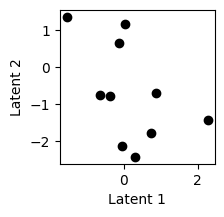

In [27]:
# plotting just first two latents
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_init[:,0],C_init[:,1], color='k')
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')

In [28]:
# current varimax objective per latent
1/N*np.sum(C_init**4, axis=0)-(1/(N**2))*np.sum(C_init**2,axis=0)**2

array([2.42257368, 3.14189095, 0.35133073, 2.7736221 , 0.87980852])

In [29]:
# final varimax objective
np.sum(
    1/N*np.sum(C_init**4, axis=0)-(1/(N**2))*np.sum(C_init**2,axis=0)**2
)

np.float64(9.569225973354925)

## Check Analyticity

Checking analytically derived gradient of varimax objective wrt $\mathbf{C}$.

In [30]:
def varimax(C):
  N = C.shape[0]
  return np.sum(1/N*np.sum(C**4, axis=0)-(1/(N**2))*np.sum(C**2,axis=0)**2)

In [31]:
f=lambda C: varimax(C)
def finite_difference_gradient(f, C, h=1e-5):
    grad = np.zeros_like(C)
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            E = np.zeros_like(C)
            E[i, j] = 1
            grad[i, j] = (f(C + h * E) - f(C - h * E)) / (2 * h)
    return grad

In [32]:
finite_difference_gradient(f, C_init)

array([[ 3.82197773,  0.02061169, -0.05170703,  0.14496156,  0.13529951],
       [-0.12145256, -0.7329684 ,  0.17563867, -0.15320779,  0.0289543 ],
       [-0.10725244, -3.59937918,  0.02479056,  0.12778109, -0.02987164],
       [ 0.11969933,  0.45958186, -0.03632504, -0.12570986,  0.05671376],
       [-0.05939375,  0.4439468 ,  0.05962028, -0.64281543,  0.22432616],
       [ 0.02087131, -2.10283423,  0.05049941, -4.46229891, -0.06555708],
       [-0.01812166, -0.33379603, -0.46367455, -0.16326727, -0.01692376],
       [ 0.13888479,  0.4539779 , -0.01828721,  0.07293203,  0.44198355],
       [ 0.04648014, -0.43090106,  0.01057542,  0.1461466 ,  1.57479517],
       [-0.86429389, -0.13287005,  0.56395452, -0.03327795, -0.09283183]])

In [33]:
s = 1/N*np.sum(C_init**2, axis=0)
S = np.repeat(s[np.newaxis,:],N,axis=0)
G = 4/N*(C_init**3-np.multiply(C_init,S))
G

array([[ 3.82197773,  0.02061169, -0.05170703,  0.14496156,  0.13529951],
       [-0.12145256, -0.7329684 ,  0.17563867, -0.15320779,  0.0289543 ],
       [-0.10725244, -3.59937918,  0.02479056,  0.12778109, -0.02987164],
       [ 0.11969933,  0.45958186, -0.03632504, -0.12570986,  0.05671376],
       [-0.05939375,  0.4439468 ,  0.05962028, -0.64281543,  0.22432616],
       [ 0.02087131, -2.10283423,  0.05049941, -4.46229891, -0.06555708],
       [-0.01812166, -0.33379603, -0.46367455, -0.16326727, -0.01692376],
       [ 0.13888479,  0.4539779 , -0.01828721,  0.07293203,  0.44198355],
       [ 0.04648014, -0.43090106,  0.01057542,  0.1461466 ,  1.57479517],
       [-0.86429389, -0.13287005,  0.56395452, -0.03327795, -0.09283183]])

$\mathbf{G}$, our analytical gradient (check `derivation.pdf`) should be the same as what our function `finite_differences()` outputs.

Checking analytically derived gradient of varimax w.r.t. a random $\mathbf{R}$, using the chain rule:

In [34]:
R = np.random.randn(L,L)
U, _, Vt = np.linalg.svd(R)
R = U @ Vt

In [35]:
def varimax_R(C, R):
  N = C.shape[0]
  C_rot = C @ R
  return np.sum(1/N*np.sum(C_rot**4, axis=0)-(1/(N**2))*np.sum(C_rot**2,axis=0)**2)

In [36]:
f_R=lambda C,R: varimax_R(C,R)
def finite_difference_gradient_R(f_R, C, R, h=1e-5):
    grad = np.zeros_like(R)
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            E = np.zeros_like(R)
            E[i, j] = 1
            grad[i, j] = (f_R(C,R + h * E) - f_R(C,R - h * E)) / (2 * h)
    return grad

In [37]:
finite_difference_gradient_R(f_R,C_init,R)

array([[ -0.87182296,   2.05516887,   2.99994375,   1.97961995,
         -1.75032199],
       [-14.05067605,  -4.65351777,  -2.38791496,  -1.18344566,
          0.96440317],
       [ -0.76968009,  -1.18611754,  -1.5384855 ,   0.39961658,
          0.22495496],
       [-10.39164676,  -5.17028476,  -0.71865383,  -0.50676233,
          0.20448145],
       [  0.57472152,   1.51016031,  -1.44300459,   0.12964882,
          1.79972179]])

In [38]:
s = 1/N*np.sum((C_init @ R)**2, axis=0)
S = np.repeat(s[np.newaxis,:],N,axis=0)
G_R = 4/N*C_init.T @ ((C_init @ R)**3-np.multiply(C_init @ R,S))
G_R

array([[ -0.87182296,   2.05516887,   2.99994375,   1.97961995,
         -1.75032199],
       [-14.05067605,  -4.65351776,  -2.38791496,  -1.18344566,
          0.96440317],
       [ -0.76968009,  -1.18611754,  -1.5384855 ,   0.39961658,
          0.22495496],
       [-10.39164675,  -5.17028476,  -0.71865383,  -0.50676233,
          0.20448145],
       [  0.57472152,   1.51016031,  -1.44300459,   0.12964882,
          1.79972179]])

Like before, these should also be the same.

## Projected gradient ascent.

Now we would like our eventual gradient $\mathbf{P}$, when taken a step in that direction from $\mathbf{R}$, to give us another orthogonal matrix (hence satisfying $(\mathbf{R}+\eta\mathbf{P})^\top(\mathbf{R}+\eta\mathbf{P})=\mathbf{I}$. To ensure this, $\mathbf{P}$ is of a certain form (`derivation.pdf`), yet this only ensures orthogonality up to first order. We hence do a projection onto the Stiefel manifold (manifold of orthogonal matrices) with svd-decomposition of $\mathbf{R}+\eta\mathbf{P}$. Yet, reflections belong to this manifold too, thus we ensure additionally that the determinant of the projection is +1 (not -1) and hence maximize over rotation matrices only.

In [39]:
R = np.eye(L) # start from unitary matrix

Cv = C_init.copy()
Rv = R.copy()

varimaxes = []
varimaxes.append(varimax(C_init@R))

Rs = []
Rs.append(R)

for it in range(iters):
  # calculate gradient for R
  C_rot = Cv @ Rv
  c_varimax = varimax(C_rot)
  s = 1/N*np.sum(C_rot**2, axis=0)
  S = np.repeat(s[np.newaxis,:],N,axis=0)
  grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
  P = 1/2*(grad - Rv @ grad.T @ Rv)

  # apply grad
  Rv = Rv + lr*P

  # project to manifold of rotation matrices
  U, _, Vt = np.linalg.svd(Rv)
  R_new = U @ Vt
  if np.linalg.det(R_new) < 0:
      U[:, -1] *= -1
      R_new = U @ Vt

  Rv = R_new
  n_varimax = varimax(C_init@Rv)
  if n_varimax < c_varimax:
    lr/=2

  varimaxes.append(varimax(C_init@Rv))
  Rs.append(Rv)

In [40]:
# check:
Rv @ Rv.T

array([[ 1.00000000e+00,  2.39982315e-16,  9.55976496e-17,
        -1.06146715e-16,  7.01208643e-18],
       [ 2.39982315e-16,  1.00000000e+00,  3.27708794e-16,
         5.46855449e-17, -2.34279136e-16],
       [ 9.55976496e-17,  3.27708794e-16,  1.00000000e+00,
         3.65971734e-16,  6.81256453e-17],
       [-1.06146715e-16,  5.46855449e-17,  3.65971734e-16,
         1.00000000e+00,  1.53070797e-16],
       [ 7.01208643e-18, -2.34279136e-16,  6.81256453e-17,
         1.53070797e-16,  1.00000000e+00]])

In [41]:
varimax(C_init@R)

np.float64(9.569225973354925)

In [42]:
varimax(C_init@Rv)

np.float64(15.763858190177961)

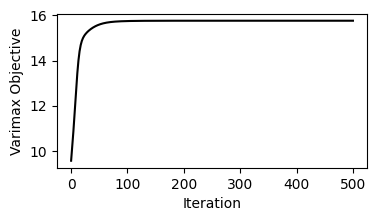

In [43]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.plot(varimaxes, color='k')
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()

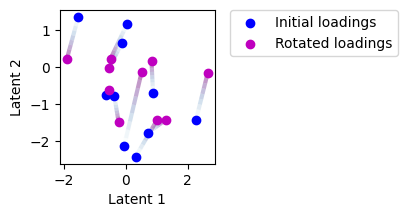

In [44]:
# plotting just first two latents
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_init[:,0],C_init[:,1], color='b', label='Initial loadings')
ax.scatter((C_init @ Rv)[:,0],(C_init @ Rv)[:,1], color='m', label='Rotated loadings')
for n in range(N):
    x = np.linspace(C_init[n,0],(C_init @ Rv)[n,0], 10)
    y = np.linspace(C_init[n,1],(C_init @ Rv)[n,1], 10)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(0, 1)
    lc = LineCollection(segments, cmap='BuPu', norm=norm)
    lc.set_array(np.linspace(0, 1, 10))
    lc.set_linewidth(3)
    lc.set_alpha(0.5)
    lc.set_zorder(0)
    line = ax.add_collection(lc)
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.legend(loc=(1.1,.7))

Finally, let us do it for multiple different rotation matrix initializations.

In [45]:
inits=100

Cv = C_init.copy()

varimaxes = np.zeros((inits, iters+1))

for init in range(inits):
  R = np.random.randn(L,L)
  U,_,Vt = np.linalg.svd(R)
  R = U @ Vt
  if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
  Rv = R.copy()
  varimaxes[init,0] = varimax(Cv@R)

  # reset learning rate (potentially)
  lr=.01

  for it in range(iters):
    C_rot = Cv @ Rv
    c_varimax = varimax(C_rot)
    s = 1/N*np.sum(C_rot**2, axis=0)
    S = np.repeat(s[np.newaxis,:],N,axis=0)
    grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
    P = 1/2*(grad - Rv @ grad.T @ Rv)

    # apply grad
    Rv = Rv + lr*P

    # project to manifold of rotation matrices
    U, _, Vt = np.linalg.svd(Rv)
    R_new = U @ Vt
    if np.linalg.det(R_new) < 0:
        U[:, -1] *= -1
        R_new = U @ Vt

    Rv = R_new
    n_varimax = varimax(C_init @ Rv)
    if n_varimax < c_varimax:
      lr/=2
    varimaxes[init,it+1] = varimax(Cv@Rv)

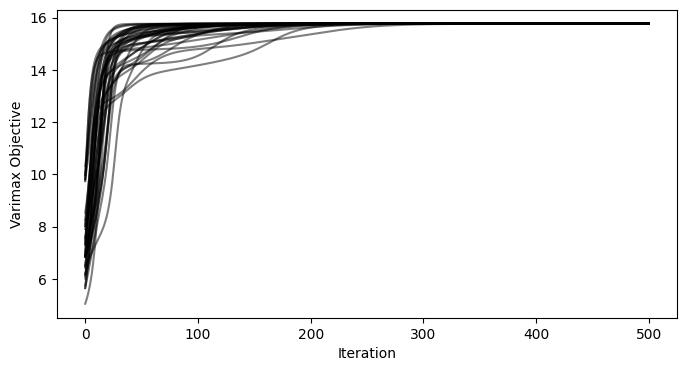

In [46]:
# plotting just first 40 learning trajectories
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(varimaxes[:40,:].T, color='k', alpha=0.5);
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()